In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

0.9014784530438006
0.9980521711025847


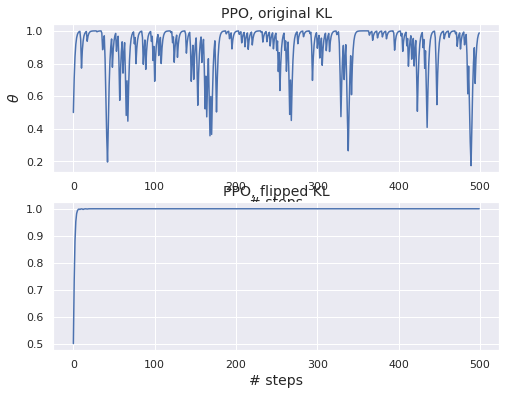

In [2]:
n = 500
fig, axes = plt.subplots(2, 1, figsize=(8,6))

thetas = np.zeros(n)
thetas[0] = 0.5
adv_sgn = np.zeros(n)
for i in range(0, n-1):
    if np.random.rand() <= 0.8:
        thetas[i+1] = np.sqrt(thetas[i])
    else:
        thetas[i+1] = 1 - np.sqrt(1-thetas[i])
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[0])
print(np.mean(thetas))
thetas = np.zeros(n)
thetas[0] = 0.5
for i in range(0, n-1):
    if np.random.rand() <= 0.8:
        thetas[i+1] = thetas[i] * np.exp(0.5) / (
            thetas[i] * np.exp(0.5) + (1-thetas[i]) * np.exp(-0.5))
    else:
        thetas[i+1] = thetas[i] * np.exp(-0.5) / (
            (1-thetas[i]) * np.exp(0.5) + thetas[i] * np.exp(-0.5))
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[1])
print(np.mean(thetas))
axes[0].set_ylabel(r'$\theta$', fontsize=14)
axes[0].set_xlabel('# steps', fontsize=14)
axes[1].set_xlabel('# steps', fontsize=14)
axes[0].set_title('PPO, original KL', fontsize=14)
axes[1].set_title('PPO, flipped KL', fontsize=14)
plt.show()

0.9039015954640076
0.9965795100791546


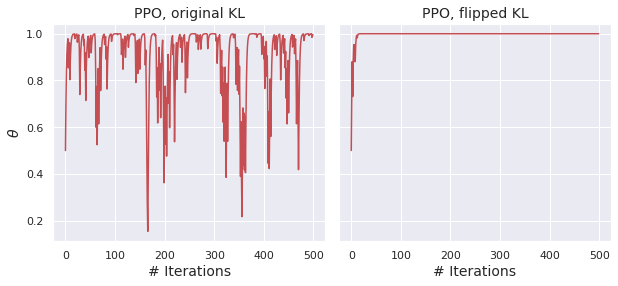

In [28]:
n = 500
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

thetas = np.zeros(n)
thetas[0] = 0.5
adv_sgn = np.zeros(n)
for i in range(0, n-1):
    if np.random.rand() <= 0.8:
        thetas[i+1] = np.sqrt(thetas[i])
    else:
        thetas[i+1] = 1 - np.sqrt(1-thetas[i])
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[0], color='r')
print(np.mean(thetas))
thetas = np.zeros(n)
thetas[0] = 0.5
for i in range(0, n-1):
    if np.random.rand() <= 0.8:
        thetas[i+1] = thetas[i] * np.exp(0.5) / (
            thetas[i] * np.exp(0.5) + (1-thetas[i]) * np.exp(-0.5))
    else:
        thetas[i+1] = thetas[i] * np.exp(-0.5) / (
            (1-thetas[i]) * np.exp(0.5) + thetas[i] * np.exp(-0.5))
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[1], color='r')
print(np.mean(thetas))
axes[0].set_ylabel(r'$\theta$', fontsize=14)
axes[0].set_xlabel('# Iterations', fontsize=14)
axes[1].set_xlabel('# Iterations', fontsize=14)
axes[0].set_title('PPO, original KL', fontsize=14)
axes[1].set_title('PPO, flipped KL', fontsize=14)
plt.subplots_adjust(wspace=0.05)
plt.show()

In [5]:
def mw_transform(theta, sgn):
    if sgn > 0:
        return theta * np.exp(0.5) / (
            theta * np.exp(0.5) + (1-theta) * np.exp(-0.5))
    else:
        return theta * np.exp(-0.5) / (
            theta * np.exp(-0.5) + (1-theta) * np.exp(0.5))

In [28]:
np.sqrt(np.sqrt(np.sqrt(1e-8)))

0.1

In [29]:
mw_transform(mw_transform(mw_transform(1e-8, 1), 1), 1)

2.0085533089755834e-07

In [ ]:
n = 500
fig, axes = plt.subplots(1, 2, figsize=(9,4))

thetas = np.zeros(n)
thetas[0] = 0.5
for i in range(0, n-1):
    if np.random.rand() <= 0.6:
        thetas[i+1] = np.sqrt(thetas[i])
    else:
        thetas[i+1] = 1 - np.sqrt(1-thetas[i])
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[0])

thetas = np.zeros(n)
thetas[0] = 0.5
for i in range(0, n-1):
    if np.random.rand() <= 0.6:
        thetas[i+1] = thetas[i] * np.exp(0.5) / (
            thetas[i] * np.exp(0.5) + (1-thetas[i]) * np.exp(-0.5))
    else:
        thetas[i+1] = thetas[i] * np.exp(-0.5) / (
            (1-thetas[i]) * np.exp(0.5) + thetas[i] * np.exp(-0.5))
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[1])

axes[0].set_ylabel(r'$\theta$', fontsize=14)
axes[0].set_xlabel('# steps', fontsize=14)
axes[1].set_xlabel('# steps', fontsize=14)
axes[0].set_title('PPO, original KL', fontsize=14)
axes[1].set_title('PPO, flipped KL', fontsize=14)
plt.show()

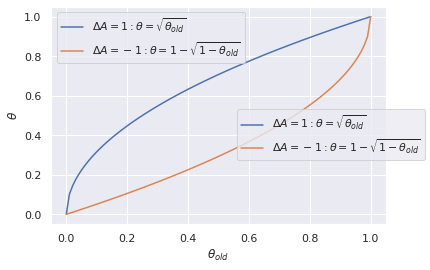

In [11]:
fig = plt.figure()
x = np.linspace(0, 1, 100)
ax = sns.lineplot(x=x, y=np.sqrt(x),
                  label=r'$\Delta A = 1: \theta=\sqrt{\theta_{old}}$')
sns.lineplot(x=x, y=1-np.sqrt(1-x),
             label=r'$\Delta A = -1: \theta=1-\sqrt{1-\theta_{old}}$',
             ax=ax)
ax.set_xlabel(r'$\theta_{old}$')
ax.set_ylabel(r'$\theta$')
fig.legend(loc='right')
plt.show()

In [24]:
n = 200
thetas = np.zeros(n)
thetas[0] = 0.5
for i in range(0, n-1):
    if np.random.rand() <= 0.6:
        thetas[i+1] = thetas[i] * np.exp(0.5) / (
            thetas[i] * np.exp(0.5) + (1-thetas[i]) * np.exp(-0.5))
    else:
        thetas[i+1] = thetas[i] * np.exp(-0.5) / (
            (1-thetas[i]) * np.exp(0.5) + thetas[i] * np.exp(-0.5))

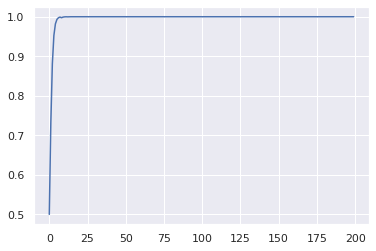

In [25]:
sns.lineplot(x=np.arange(n),y=thetas)
plt.show()